# Visualizing the data in `preproccessed_SNL_data.h5`

In [1]:
import numpy as np
import os
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE" # on NERSC filelocking is not allowed
import h5py
from matplotlib import pyplot as plt

In [ ]:
# Load data
home_path = "/global/cfs/cdirs/m2616/jananinf/projsIO/ToyVAE/" # Updated to NERSC
file_path = home_path + "preprocessed_SNL_data.h5"
with h5py.File(file_path, 'r') as hf:           # Shapes:
    X_train = hf['X_train'][:]                  # (3200000, 57)
    X_test  = hf['X_test'][:]                   # (800000,  57)
    Ato4l_data  = hf['Ato4l_data'][:]           # (55969,   57) Signal data? 
    hToTauTau_data  = hf['hToTauTau_data'][:]   # (691283,  57)
    hChToTauNu_data  = hf['hChToTauNu_data'][:] # (760272,  57)
    leptoquark_data = hf['leptoquark_data'][:]  # (340544,  57)
    print("Data loaded from preprocessed_SNL_data.h5")


Data loaded from preprocessed_SNL_data.h5


We will compare $p_t$, $\eta$, $\phi$ of the first electron, muon, jet and MET 
acros the training data, testing data, Ato4l, htoTauTau, hChToTauNu, and lepto_quark

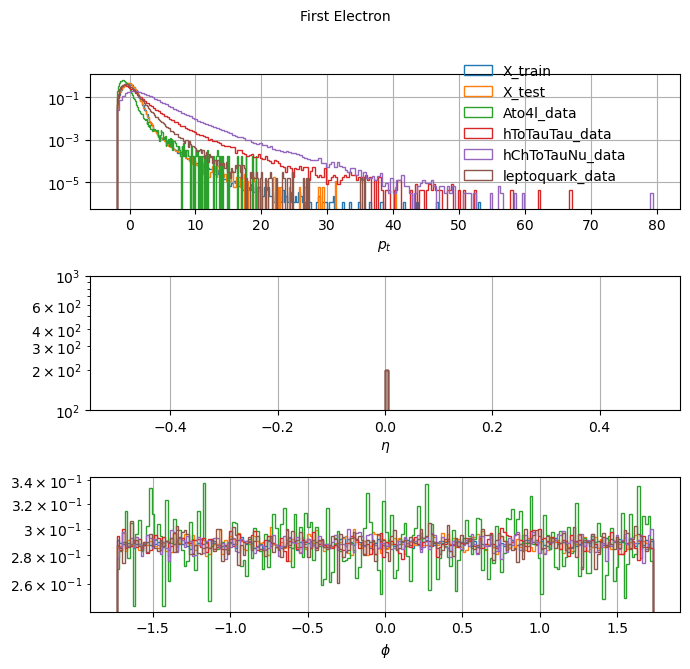

In [ ]:

DATA_SET = [X_train, X_test, Ato4l_data, hToTauTau_data, hChToTauNu_data, leptoquark_data]
DATA_LABELS = ["X_train", "X_test", "Ato4l_data", "hToTauTau_data", "hChToTauNu_data", "leptoquark_data"]
X_LABELS = ["$p_t$", "$\eta$","$\phi$"]


idx_key = 0 # 0,3,6,9 gives electrons
            # 12,15,18,21 gives muons
            # 24, 27, 30 ... 54 gives Jets
            # 55 gives MET
# This is assuming the data is flattened as [pt, eta, phi, pt, eta, phi, ...
#                                    index: [0,    1,   2,  3,   4,   5, ...
#                                           [electron 1 ], [electron2 ], ...

def plot_dist(idx_key, title):
    """
    plots eta, theta phi for 
    idx_key : 0,3,6,9 gives electrons
              12,15,18,21 gives muons
              24, 27, 30 ... 54 gives Jets
              55 gives MET
              This is assuming the data is flattened as [pt, eta, phi, pt, eta, phi, ...
                                                 index: [0,    1,   2,  3,   4,   5, ...
     Title for the plot            
    """
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7,7))
    for i in range(3): # loop over pt, eta, phi
        for data, label in zip(DATA_SET, DATA_LABELS):
            # loop over each data set and plot distribution
            ax[i].hist(data[:, idx_key+i]
                    , density=True
                    , histtype="step"
                    , bins=200
                    , label=label)
        ax[i].set_yscale('log')
        ax[i].grid()
        ax[i].set_xlabel(X_LABELS[i])
    fig.suptitle(title, fontsize=10)

    handles, labels = ax[0].get_legend_handles_labels()   # same on every subplot
    fig.legend(handles, labels,
            loc="upper right",          # choose where you want it
            bbox_to_anchor=(0.95, 0.95),# (x, y) in figure coords
            frameon=False, ncol=1)      # ncol>1 if you want a row layou
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave room for suptitle
    plt.show()
plot_dist(0,"Electron 1")


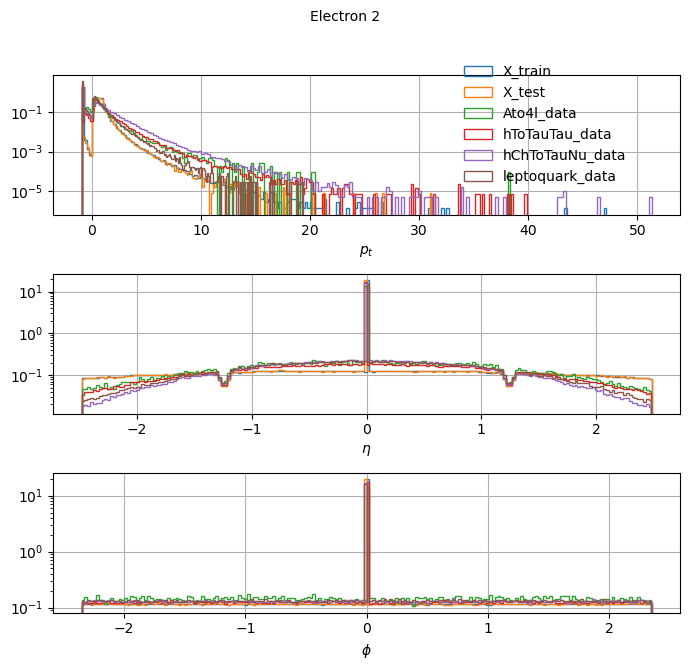

In [90]:
plot_dist(3, "Electron 2")

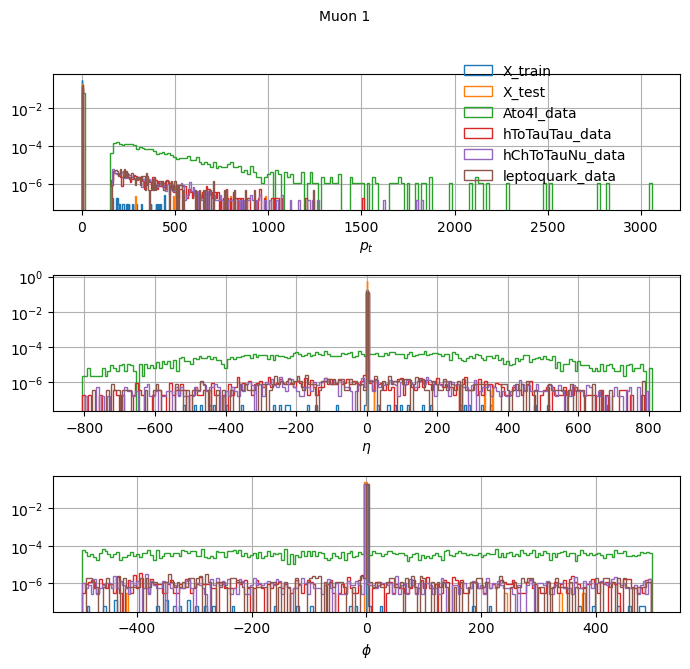

In [91]:
plot_dist(12, "Muon 1")